In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [4]:
movies["genres"] = movies.genres.str.split("|")
# movies["year"] = movies.title.str.extract("(\(\d\d\d\d\))", expand=False)
movies["year"] = movies.title.str.extract("(\(\d\d\d\d-?\d*\))", expand=False)
movies["year"] = movies.year.str.extract("(\d\d\d\d)", expand=False).astype("Int64")
movies["title"] = movies.title.str.replace("(\(\d+-?\d*\))", "", regex=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
 3   year     10327 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 333.0+ KB


In [6]:
movies.isna().sum()

movieId    0
title      0
genres     0
year       2
dtype: int64

In [7]:
movies[movies["year"].isna()]

,movieId,title,genres,year
10172,126929,Li'l Quinquin ( ),[(no genres listed)],<NA>
10322,146344,Elämältä kaiken sain ( ),"[Comedy, Drama]",<NA>


In [8]:
unique_genres = set()
movies.genres.apply(lambda x: unique_genres.update(x))
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [9]:
movies.loc[movies.genres.str.join("|").str.contains("no genres listed"), "genres"] = np.NaN
movies[movies["genres"].isna()]

,movieId,title,genres,year
10172,126929,Li'l Quinquin ( ),NaN,<NA>
10260,135460,Pablo,NaN,2012
10280,138863,The Big Broadcast of 1936,NaN,1935
10301,141305,Round Trip to Heaven,NaN,1992
10303,141472,The 50 Year Argument,NaN,2014
10317,143709,The Take,NaN,2009
10328,149532,Marco Polo: One Hundred Eyes,NaN,2015


In [10]:
unique_genres = set()
movies.genres.apply(lambda x: unique_genres.update(x) if x is not np.NaN else None)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [11]:
# movies that contains () in title
movies.loc[list(set(movies[movies["title"].str.contains("\(")].index) - set(movies[movies["title"].str.contains("\(\w+")].index))]

,movieId,title,genres,year
953,1190,Tie Me Up! Tie Me Down! (¡Átame!),"[Crime, Drama, Romance]",1990
10322,146344,Elämältä kaiken sain ( ),"[Comedy, Drama]",<NA>
10172,126929,Li'l Quinquin ( ),NaN,<NA>


In [12]:
movies.dropna(inplace=True)
movies.isna().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10321 entries, 0 to 10327
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10321 non-null  int64 
 1   title    10321 non-null  object
 2   genres   10321 non-null  object
 3   year     10321 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 413.2+ KB


In [14]:
movies.set_index("movieId", inplace=True, drop=True)
movies.head()

,title,genres,year
movieId,,,
1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
2,Jumanji,"[Adventure, Children, Fantasy]",1995
3,Grumpier Old Men,"[Comedy, Romance]",1995
4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
5,Father of the Bride Part II,[Comedy],1995


In [15]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [16]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [17]:
len(ratings)

105339

In [18]:
timestamp = []
for time in ratings["timestamp"]:
    timestamp.append(datetime.fromtimestamp(time))
ratings["timestamp"] = timestamp
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])
ratings["timestamp"] = ratings["timestamp"].dt.year
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,2008
1,1,24,1.5,2008
2,1,32,4.0,2008
3,1,47,4.0,2008
4,1,50,4.0,2008


In [19]:
print(ratings.shape)
for removed_movie in set(ratings.movieId.unique()) - set(ratings.movieId.unique()).intersection(set(movies.index)):
    ratings.drop(ratings[ratings["movieId"] == removed_movie].index, inplace=True)
print(ratings.shape)

(105339, 4)
(105331, 4)


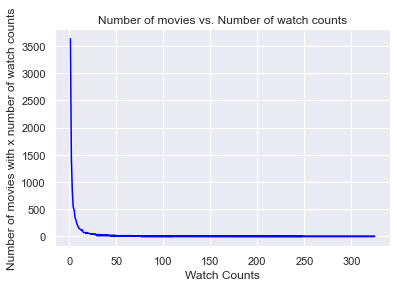

In [20]:
ratings_count = ratings.groupby("movieId")["rating"].count()
ratings_count = ratings_count.value_counts()
plt.xlabel("Watch Counts")
plt.ylabel("Number of movies with x number of watch counts")
plt.title("Number of movies vs. Number of watch counts")
plt.plot(ratings_count.index, ratings_count.values, color="blue")

In [21]:
ratings_count

1      3630
2      1455
3       838
4       539
5       484
       ... 
165       1
131       1
154       1
171       1
110       1
Name: rating, Length: 184, dtype: int64

The plot shows that there 3600 movies which are watched only once.

In [22]:
movies_ratings_mean = ratings.groupby("movieId")[["rating"]].mean().rename(columns={"rating": "rating_mean"})
movies_ratings_count = ratings.groupby("movieId")[["rating"]].count().rename(columns={"rating": "watch_count"})

In [23]:
movie_statistics = pd.concat([movies_ratings_mean, movies_ratings_count], axis=1)
movie_statistics.head()

,rating_mean,watch_count
movieId,,
1,3.907328,232
2,3.353261,92
3,3.189655,58
4,2.818182,11
5,3.250000,62


In [24]:
movie_statistics = movies.join(movie_statistics, on="movieId")
movie_statistics.sort_values(by=["watch_count","rating_mean"], ascending=False, inplace=True)
movie_statistics.head(10)

,title,genres,year,rating_mean,watch_count
movieId,,,,,
296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,4.160000,325.0
356,Forrest Gump,"[Comedy, Drama, Romance, War]",1994,4.138264,311.0
318,"Shawshank Redemption, The","[Crime, Drama]",1994,4.454545,308.0
480,Jurassic Park,"[Action, Adventure, Sci-Fi, Thriller]",1993,3.659864,294.0
593,"Silence of the Lambs, The","[Crime, Horror, Thriller]",1991,4.194828,290.0
260,Star Wars: Episode IV - A New Hope,"[Action, Adventure, Sci-Fi]",1977,4.188645,273.0
2571,"Matrix, The","[Action, Sci-Fi, Thriller]",1999,4.264368,261.0
589,Terminator 2: Judgment Day,"[Action, Sci-Fi]",1991,3.960474,253.0
527,Schindler's List,"[Drama, War]",1993,4.296371,248.0


# Plotting

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

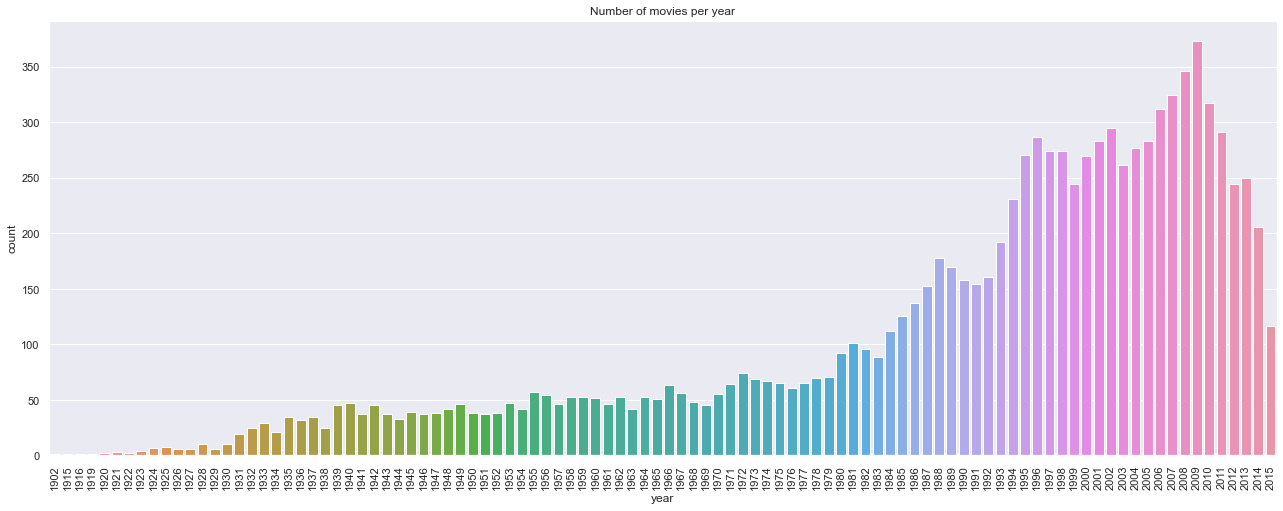

In [26]:
plt.figure(figsize=(22, 8))
sns.countplot(x="year", data=movie_statistics)
plt.xticks(rotation=90)
plt.title("Number of movies per year")
plt.show()

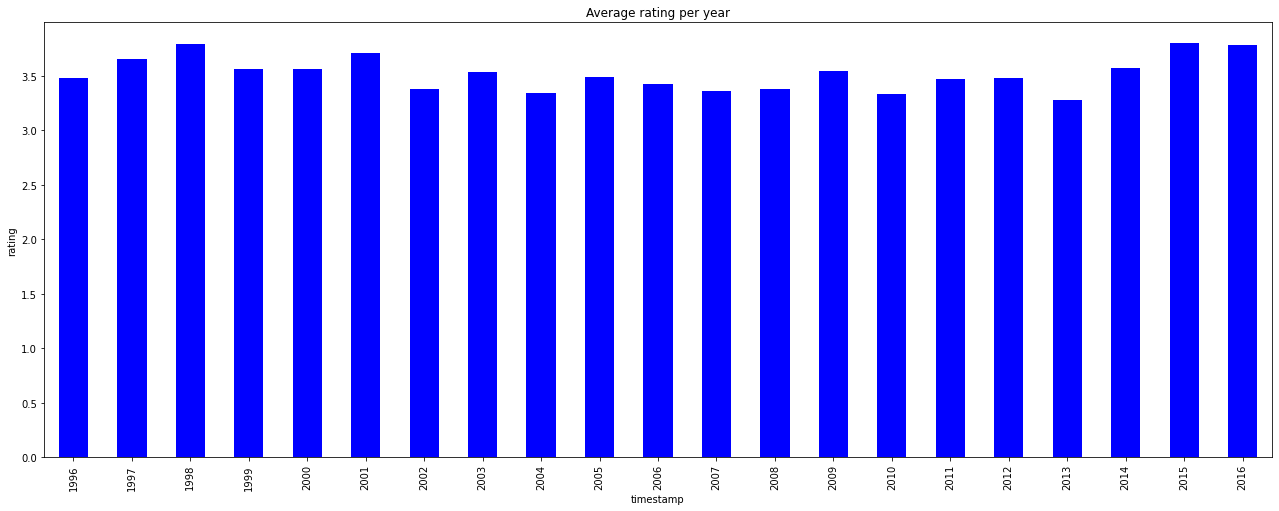

In [27]:
plt.figure(figsize=(22, 8))
plt.style.use("default")
ratings.groupby("timestamp")["rating"].mean().plot(kind="bar", color="blue")
plt.title("Average rating per year")
plt.ylabel("rating")
plt.show()

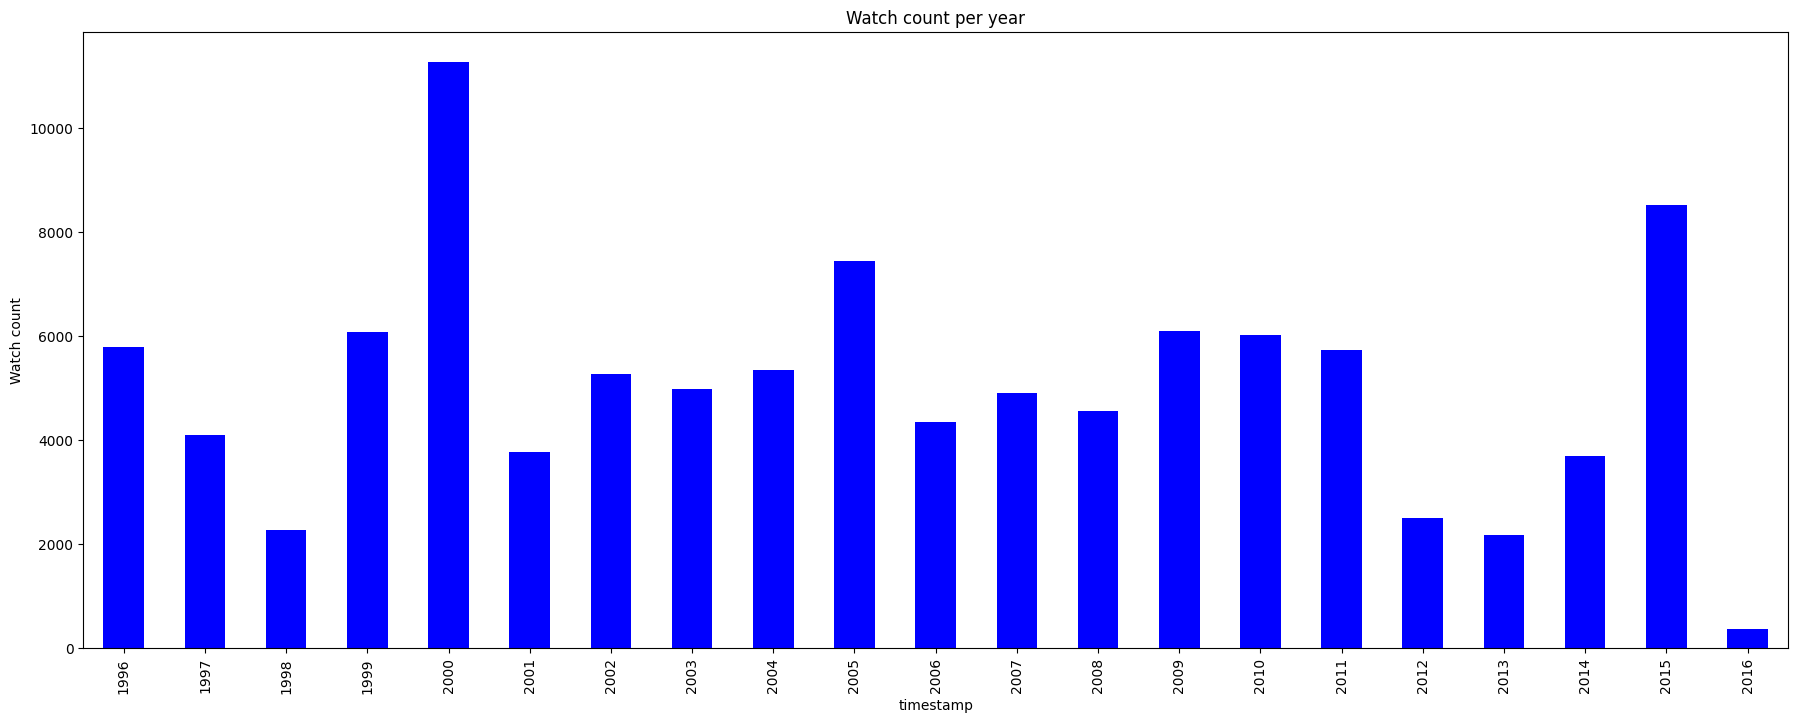

In [28]:
plt.figure(figsize=(22, 8))
plt.style.use("default")
ratings.groupby("timestamp")["rating"].count().plot(kind="bar", color="blue")
plt.title("Watch count per year")
plt.ylabel("Watch count")
plt.show()